In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
def scatter_plot(data, col=None):
    from mpl_toolkits.mplot3d import Axes3D 
    %matplotlib inline
    fig = plt.figure(figsize = (12, 9))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:,0], data[:,1], data[:,2], s = 0.5, color=col)
    plt.show()

In [4]:
N = 10000   # число точек
K = 3       # число кластеров
d = 3       # размерность пространства
L = 10      #

In [5]:
# Generate some data
np.random.seed(45)
mu_true = np.random.uniform(-L, L, size = (K, d))
data = np.random.normal(mu_true, size = (N, K, d))
data = np.vstack(data)
np.random.shuffle(data)

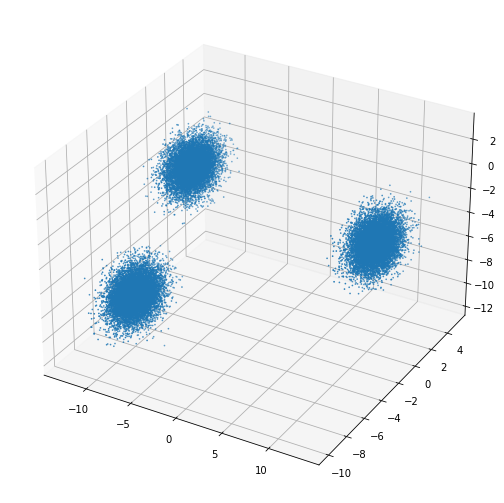

In [6]:
if d == 3:
    scatter_plot(data, None)

In [7]:
# Рандомно выбранные центры 3х кластеров
mu = data[np.random.choice(data.shape[0], K, replace=False)]

# Создание массива с цветом каждой точки, 
# т.е.рандомное присвоение точки некоторому кластеру
c = np.random.randint(low=0, high=K-1, size=data.shape[0])

In [33]:
def dist_i(x, mu):
    # x: N datapoints, mu: N cluster centers
    # returns: D_{i}, squared distances from x[i] to mu[i]
    dist = np.zeros(x.shape[0])
#     for i in range(x.shape[0]):
#         dist[i] = np.sum((x[i] - mu[i])**2)
    dist = np.dot((x - mu).T, (x - mu))
    print(dist.shape)
    return dist
def dist_ij(x, mu):
    # x: N datapoints, mu: K cluster centers
    # returns: D_{ij}, squared distances from x[i] to mu[j]
    dist = np.zeros((x.shape[0], mu.shape[0]))
    for i in range(x.shape[0]):
        for j in range(mu.shape[0]):
            dist[i, j] += np.sum((x[i] - mu[j])**2)
    return dist

In [31]:
print(mu.shape)

(3, 3)


In [34]:
ss_list = []
for n in range(10):
    c =  np.argmin(dist_ij(data, mu), axis = 1)    
    ss = np.mean(dist_i(data, mu[c]))
    ss_list.append(ss)    
    for i in range(K):
        cluster_members = data[c == i]
        cluster_members = cluster_members.mean(axis = 0)
        mu[i] = cluster_members

ValueError: shape-mismatch for sum

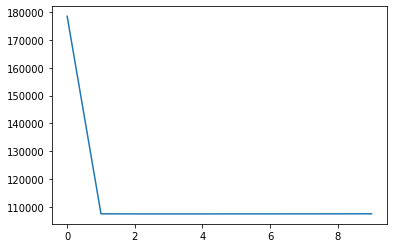

In [11]:
plt.plot(ss_list)

In [12]:
colors = np.array([plt.cm.cool(i/(K-1)) for i in range(K)])

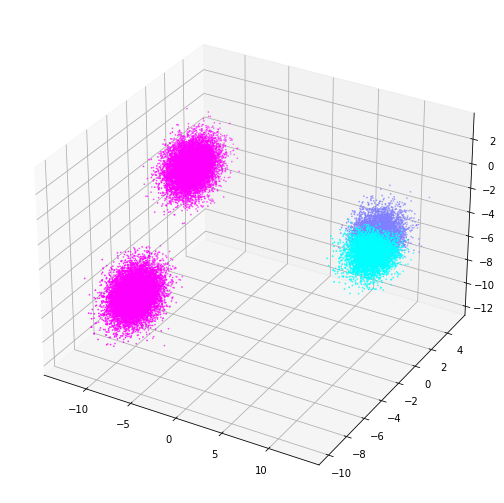

In [13]:
if d == 3:
    scatter_plot(data, colors[c])